# Tensorflow

TensorFlow library is used for numerical computation. It makes graph in which data flows. Tensorflow has nodes(representing mathematical operations) and edges(tensors between operations). In TensorFlow, you first need to create a __blueprint__ of whatever you want to create. While you are creating the graph, variables don’t have any value. Later when you have created the complete graph, you have to run it inside a session, only then the variables have any values.



# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorboard as tb
import tensorflow as tf

# Initializing Matplotlib

In [2]:
%matplotlib notebook
random.seed(9)

# Placeholders

In [3]:
x_input = tf.placeholder(dtype=tf.float32, shape=[None])
m_init = random.uniform(-2, 2)
c_init = 0
m = tf.Variable(m_init, dtype=tf.float32, name="m")
c = tf.Variable(c_init, dtype=tf.float32, name="c")

# Training Data

In [4]:
x_data = np.linspace(-1, 1, 101)
y_data = 2*x_data + np.random.randn(*x_data.shape) * 0.33

# Modelling 

<IPython.core.display.Javascript object>


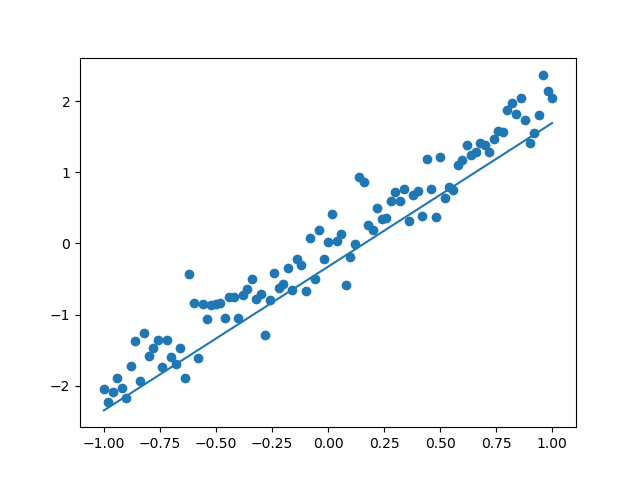

In [5]:
mx = tf.multiply(m, x_input)
y_model = tf.add(mx, c)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output = sess.run(y_model, feed_dict={x_input: x_data})
# print(output)

# To check consistency of data
# y_init = m_init*x_data + c_init
# print(y_init)

# Plotting the data points
fig = plt.figure()
plt.scatter(x_data, y_data)

target = tf.placeholder(dtype=tf.float32, shape=[None])
error = tf.square(tf.subtract(y_model, target))
loss = tf.reduce_sum(error)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_step = optimizer.minimize(loss)

# Run

In [6]:
iterations = 100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iterations):
        _, y_next = sess.run([train_step, y_model], feed_dict={x_input: x_data, target: y_data})
        line, = plt.plot(x_data, y_next)
        fig.canvas.draw()
        line.remove()
    
plt.plot(x_data, y_next)
fig.canvas.draw()